In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**IMPORTING THE DATA**

In [2]:
df=pd.read_csv("StudentsPerformance.csv")

### EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       999 non-null    object 
 1   race/ethnicity               999 non-null    object 
 2   parental level of education  998 non-null    object 
 3   lunch                        994 non-null    object 
 4   test preparation course      999 non-null    object 
 5   math score                   999 non-null    float64
 6   reading score                996 non-null    float64
 7   writing score                997 non-null    float64
dtypes: float64(3), object(5)
memory usage: 62.6+ KB


In [4]:
df.describe(include='all')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,999,999,998,994,999,999.000000,996.000000,997.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,517,319,226,642,641,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.093093,69.173695,68.058175
std,NaN,NaN,NaN,NaN,NaN,15.170122,14.625542,15.215409
min,NaN,NaN,NaN,NaN,NaN,0.000000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.000000,59.000000,57.000000
50%,NaN,NaN,NaN,NaN,NaN,66.000000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.000000,79.250000,79.000000


The given dataset belongs to an analysis of Students Performace. It has total 8 columns, 5 categorical and 3 numerical.
Considering that the performance of the students is to be evaluated on the basis of all the three scores we will be combining the three scores later on.
Null values are present in all columns.

### Visualization

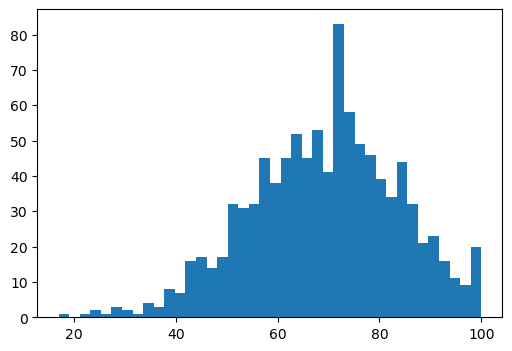

In [5]:
def histplot(column):
    plt.figure(figsize=(6,4))
    plt.hist(df[column],bins=40)
    plt.show()

histplot('reading score')

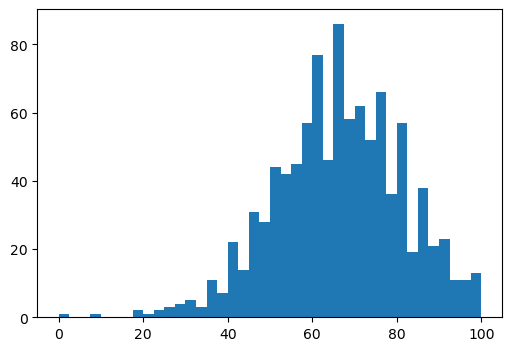

In [6]:
histplot('math score')

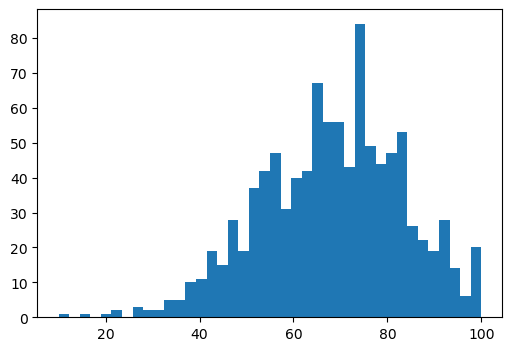

In [7]:
histplot('writing score')

Maximum number of students have marks between 60 to 80 further more very less number of students have marks below 40

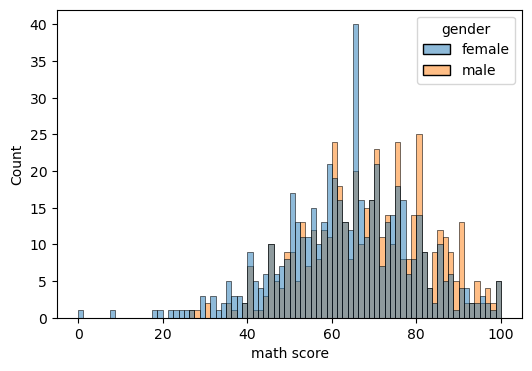

In [8]:
plt.figure(figsize=(6,4))
sns.histplot(df,x='math score',hue='gender',bins=80)
plt.show()

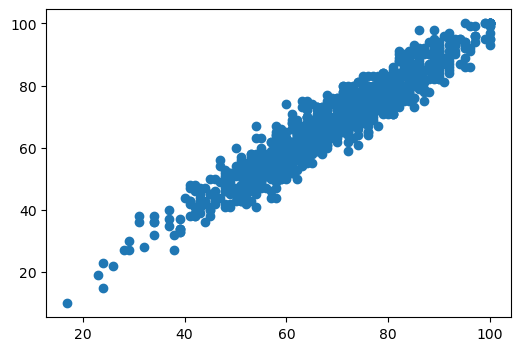

In [9]:
plt.figure(figsize=(6,4))
plt.scatter(df['reading score'],df['writing score'])
plt.show()

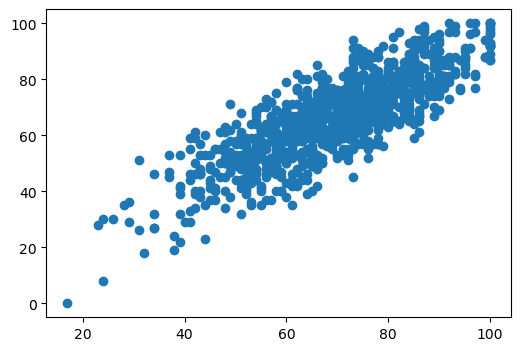

In [10]:
plt.figure(figsize=(6,4))
plt.scatter(df['reading score'],df['math score'])
plt.show()

writing and reading score are closely linearly related with each other while math score is a bit different though also having linear relation with the two

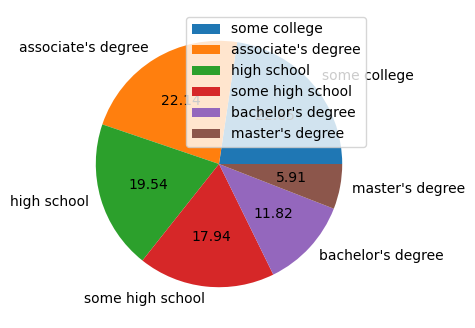

In [11]:
def pieplot(column):
    plt.figure(figsize=(6,4))
    plt.pie(df[column].value_counts().values,labels=df[column].value_counts().index,autopct='%1.2f')
    plt.legend()
pieplot('parental level of education')

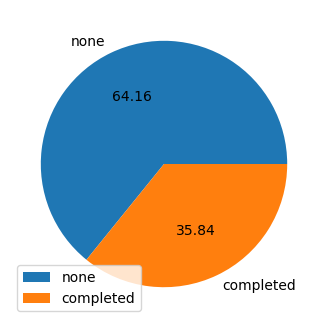

In [12]:
pieplot('test preparation course')

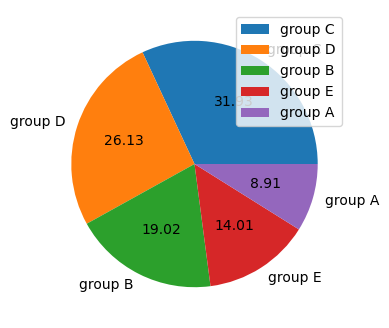

In [13]:
pieplot('race/ethnicity')

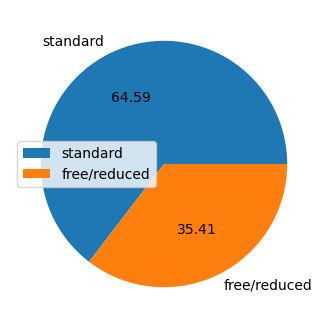

In [14]:
pieplot('lunch')

**Very less number of parents have a masters degree. Very less number of students have completed the test preperation course. Most of the students bring a standard lunch**

### Outlier handling

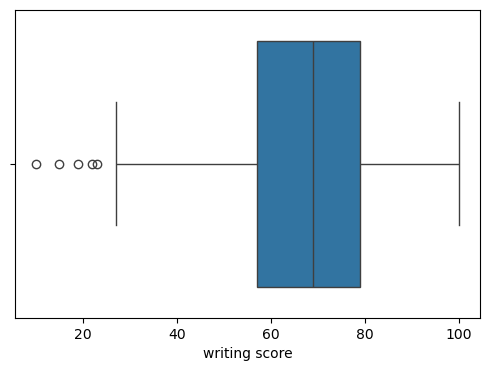

In [15]:
def boxplot(column):
    plt.figure(figsize=(6,4))
    sns.boxplot(x=column,data=df)
    plt.show()
boxplot('writing score')

In [16]:
## as we can see that some of the scores are outliers which are the onces below 30, and most of the scores are between 60 to 80. we will be handling these outliers with capping 
print(df['writing score'].quantile(0.02))

36.0


In [17]:
df['writing score']=np.where(df['writing score']<36,36,df['writing score'])

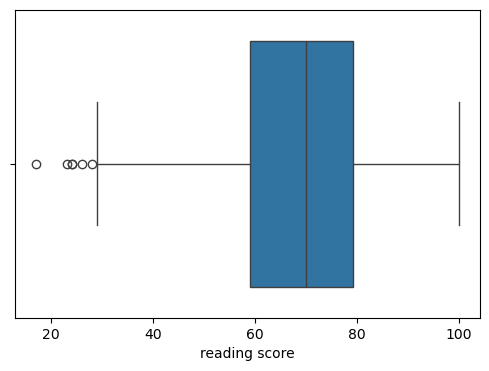

In [18]:
boxplot('reading score')

In [19]:
print(df['reading score'].quantile(0.02))

38.900000000000006


In [20]:
df['reading score']=np.where(df['reading score']<38.900000000000006,38.900000000000006,df['reading score'])

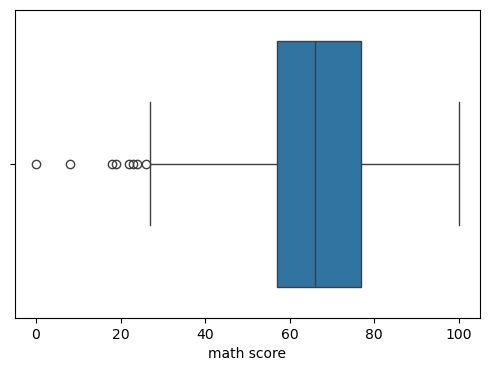

In [21]:
boxplot('math score')

In [22]:
print(df['math score'].quantile(0.02))

33.96


In [23]:
df['math score']=np.where(df['math score']<33.96,33.96,df['math score'])

### Handling Missing Values

In [24]:
df.isna().sum()

gender                         1
race/ethnicity                 1
parental level of education    2
lunch                          6
test preparation course        1
math score                     1
reading score                  4
writing score                  3
dtype: int64

We will be handling missing values of numerical data with mean and categorical data with mode

In [25]:
for column in df.columns:
    if df[column].dtype!='float64':
        df[column]=df[column].fillna(df[column].mode()[0])
    else:
        df[column]=df[column].fillna(df[column].median())

### Handling Categorical Variables

lets convert the categorical data to numerical with one hot encoding and label encoding

In [26]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()

In [27]:
df['gender']=label_encoder.fit_transform(df['gender'])

In [28]:
df['race/ethnicity']=label_encoder.fit_transform(df['race/ethnicity'])

In [29]:
df['lunch']=label_encoder.fit_transform(df['lunch'])

In [30]:
ordinal_encoder=preprocessing.OrdinalEncoder()

In [31]:
df['test preparation course']=ordinal_encoder.fit_transform(df[['test preparation course']])

In [32]:
df['parental level of education']=ordinal_encoder.fit_transform(df[['parental level of education']])

### Standardization

In [33]:
df['read/write score']=df['reading score']+df['writing score']

In [34]:
df=df.drop('reading score',axis=1)
df=df.drop('writing score',axis=1)

In [35]:
df['math score']=((df['math score']-df['math score'].mean())/df['math score'].std())
df['read/write score']=((df['read/write score']-df['read/write score'].mean())/df['read/write score'].std())

In [36]:
y_math=df['math score']
y_read_write=df['read/write score']
X=df.drop('math score',axis=1)
X=X.drop('read/write score',axis=1)

In [37]:
## predicting math score
from sklearn.model_selection import train_test_split
X_math_train,X_math_test,y_math_train,y_math_test=train_test_split(X,y_math,test_size=0.2,random_state=42)
X_rw_train,X_rw_test,y_rw_train,y_rw_test=train_test_split(X,y_read_write,test_size=0.2,random_state=42)

In [38]:
from sklearn.linear_model import LinearRegression 
math_model=LinearRegression().fit(X_math_train,y_math_train)
rw_model=LinearRegression().fit(X_rw_train,y_rw_train)

In [39]:
y_math_pred=math_model.predict(X_math_test)
y_rw_pred=rw_model.predict(X_rw_test)

In [40]:
from sklearn.metrics import mean_squared_error
math_mse=mean_squared_error(y_math_test,y_math_pred)
rw_mse=mean_squared_error(y_rw_test,y_rw_pred)
print("Math RMSE:",np.sqrt(math_mse))
print("Reading/Writing RMSE:",np.sqrt(rw_mse))

Math RMSE: 0.9035927938583902
Reading/Writing RMSE: 0.8954409352422096


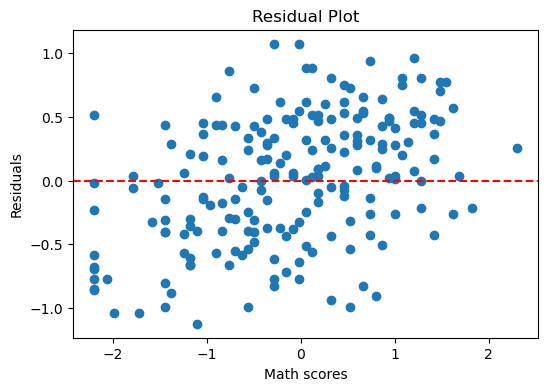

In [41]:
import seaborn as sns

math_residuals = y_math_pred

# Plot residuals
plt.figure(figsize=(6,4))
plt.scatter(y_math_test, math_residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Math scores")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

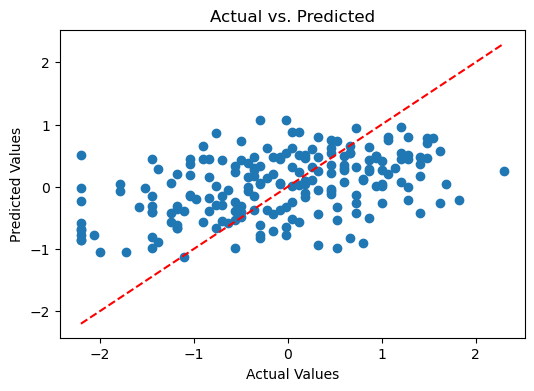

In [42]:
plt.figure(figsize=(6,4))
plt.scatter(y_math_test, y_math_pred)
plt.plot([y_math_test.min(), y_math_test.max()], [y_math_test.min(), y_math_test.max()], color="red", linestyle="--")  # 45-degree line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted")
plt.show()